Snkar Mam
Mikael Slotboom
Dorin-Mihai Manea

Exercice 1
1. Il y a 3 etats : Sain, Infecte et Gueri.
La taille du vecteur de probabilites initiales est du coup 3.
La taille de la matrice des probabilites de transition est 3x3.

In [66]:
pi0 = [0.9, 0.1, 0]

In [67]:
A = [[0.92, 0.08, 0],
     [0, 0.93, 0.07],
     [0, 0, 1]]  

In [68]:
def is_stochastic(M):
    if len(M) != len(M[0]):
        return False

    for i in range(len(M)):
        sum_line = 0

        for j in range(len(M)):
            if M[i][j] < 0 or M[i][j] > 1:
                return False
            
            sum_line += M[i][j]
        
        if sum_line != 1:
            return False
    
    return True


is_stochastic(A)


True

Exercice 1.1
1. pi1 = pi0 * A = [0.9 * 0.92, 0.9 * 0.08 + 0.1 * 0.93, 0.1 * 0.07] = [0.828, 0.165, 0.007]
2. pi2 = pi1 * A = [0.828 * 0.92, 0.828 * 0.08 + 0.165 * 0.93, 0.165 * 0.07 + 0.007 * 1] = [0.76176, 0.21969, 0.01855]

In [69]:
pi_distrib = [pi0]

def mult_vect_matrix(v, M):
    new_v = [0, 0, 0]

    for i in range(len(v)):
        for j in range(len(v)):
            new_v[i] += v[j] * M[j][i]
    
    return new_v

def pi_distribution(pi0, A):
    pi_distrib = [pi0]

    for i in range(200):
        new_pi = mult_vect_matrix(pi_distrib[i], A)
        pi_distrib.append(new_pi)
    
    return pi_distrib

pi_distrib = pi_distribution(pi0, A)

Text(0, 0.5, 'Probabilite')

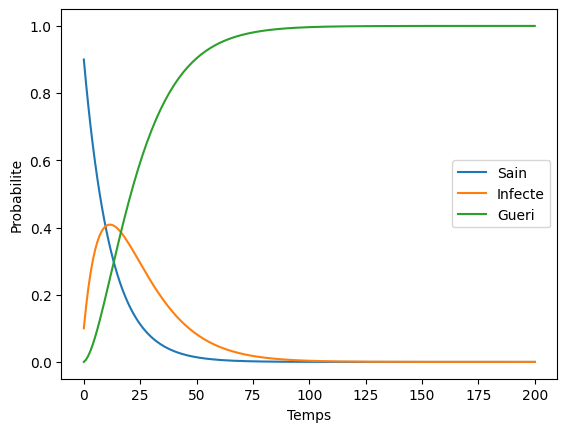

In [70]:
import matplotlib.pyplot as plt

plt.plot(range(201), [pi_distrib[i][0] for i in range(201)])
plt.plot(range(201), [pi_distrib[i][1] for i in range(201)])
plt.plot(range(201), [pi_distrib[i][2] for i in range(201)])
plt.legend(['Sain', 'Infecte', 'Gueri'])
plt.xlabel('Temps')
plt.ylabel('Probabilite')